In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm

sns.set(rc = {"figure.figsize":(16, 9)})

In [2]:
class OnlineData:

    def __init__(self, filename):
        self.filename = filename
        self.f = open(filename, 'r')
        self.TotalQ = 1
        self.Qnow = np.array([0])
        self.Pnow = np.array([0])
 
    def __next__(self):
        line = next(self.f)[:-1]
        if len(line) < 1:
            return None
        Q_, P_ = np.array([z[1:-1].split(",") for z in line.split("\t")
                          ]).astype(float).astype(int).T
        self.Qnow = Q_
        self.Pnow = P_
        CS = np.cumsum(P_ * np.ediff1d(Q_, to_begin=Q_[0]))

        self.TotalQ = sum(Q_)

        def F(Q):
            if Q <= Q_[0]:
                return P_[0] * Q
            if Q > Q_[-1]:
                return None
            i = np.searchsorted(Q_, Q)
            return CS[i - 1] + (Q - Q_[i - 1]) * P_[i]

        self.F = F
        return self.F

    def __iter__(self):
        return self

    def close(self):
        self.f.close()

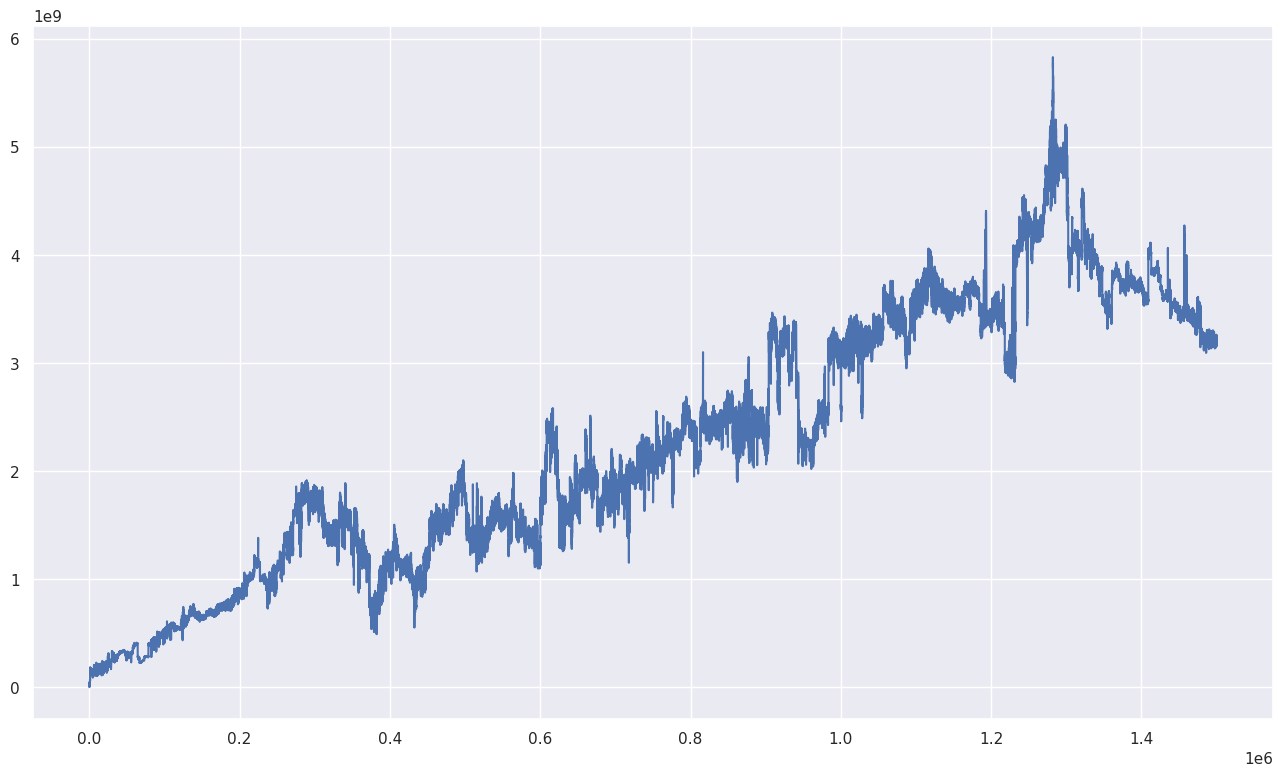

In [10]:
it1 = OnlineData('DataParsing/AllTheData/BidAsk/FullAsk.tsv')
N = 1500000
stakan = np.full((N,), 0)
for i in range(N):
    stakan[i] = it1.TotalQ 
    next(it1)

plt.plot(stakan)  

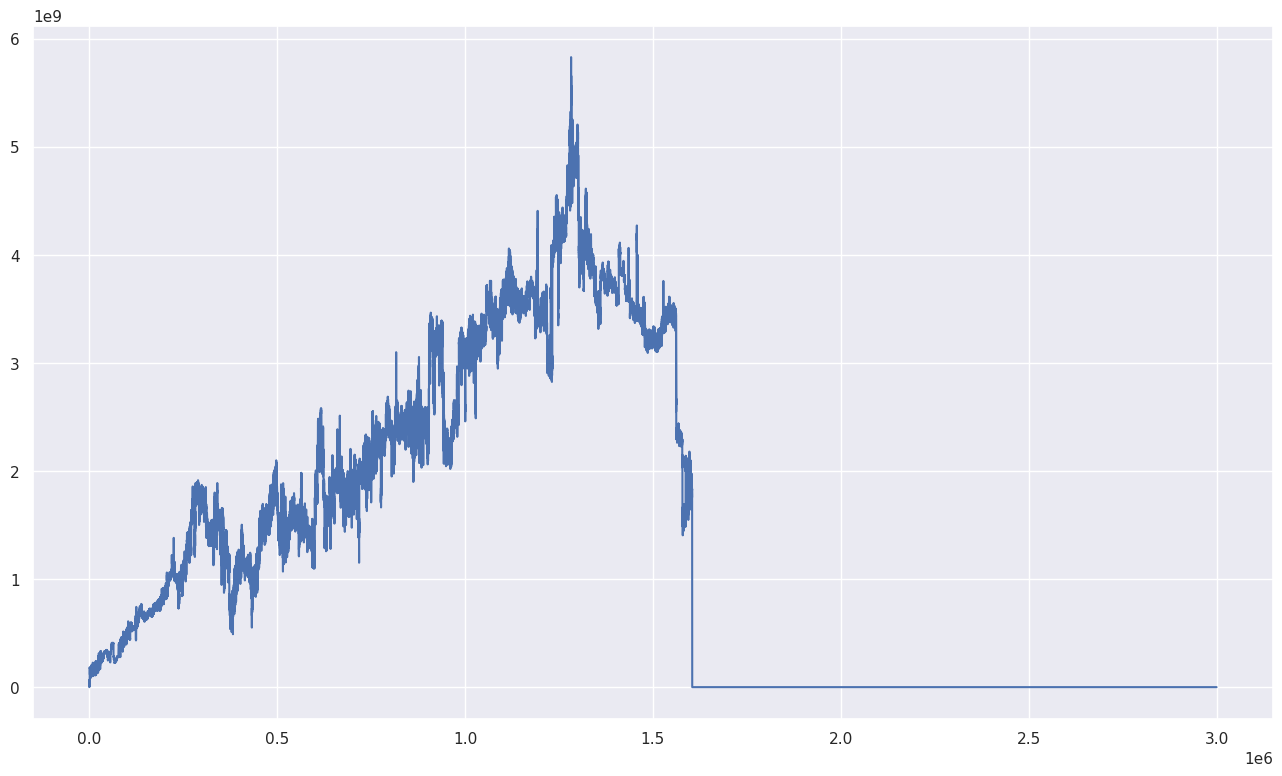

In [9]:
plt.plot(stakan)  

In [4]:
print(stakan)

[]


In [ ]:
f